# Numpy基础：数组和矢量计算
NumPy（Numerical Python的简称）是Python数值计算最重要的基础包。大多数提供科学计算的包都是用NumPy的数组作为构建基础。

NumPy的部分功能如下：

- ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
- 用于对整组数据进行快速运算的标准数学函数（无需编写循环）。
- 用于读写磁盘数据的工具以及用于操作内存映射文件的工具。
- 线性代数、随机数生成以及傅里叶变换功能。
- 用于集成由C、C++、Fortran等语言编写的代码的A C API。
NumPy本身并没有提供多么高级的数据分析功能，理解NumPy数组以及面向数组的计算将有助于你更加高效地使用诸如pandas之类的工具。

对于大部分数据分析应用而言，我最关注的功能主要集中在：

- 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算。
- 常用的数组算法，如排序、唯一化、集合运算等。
- 高效的描述统计和数据聚合/摘要运算。
- 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算。
- 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）。
- 数据的分组运算（聚合、转换、函数应用等）。。
NumPy之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。

In [8]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))
my_arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [10]:
%time for _ in range(10) : my_arr2 = my_arr * 2
len(my_arr2)

CPU times: user 23.9 ms, sys: 21.3 ms, total: 45.2 ms
Wall time: 42.3 ms


1000000

In [14]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]
len(my_list2)

CPU times: user 810 ms, sys: 190 ms, total: 1e+03 ms
Wall time: 999 ms


1000000

基于NumPy的算法要比纯Python快10到100倍（甚至更快），并且使用的内存更少。

# NumPy的ndarray：一种多维数组对象

NumPy最重要的一个特点就是其N维数组对象（即ndarray），该对象是一个快速而灵活的大数据集容器。你可以利用这种数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样。

In [15]:
import numpy as np

# Genrate some random data
data = np.random.randn(2, 3)
print(data)

[[-0.8690368   1.90577732 -0.08140754]
 [-0.3140089   1.01711362 -0.07222922]]


数学运算

In [16]:
# 所有元素都乘以10
print('data * 10: \n', data * 10)

data * 10: 
 [[-8.69036799 19.05777318 -0.81407536]
 [-3.14008899 10.1711362  -0.72229215]]


In [17]:
# 每个元素与自身相加
print('data + data :\n', data + data)

data + data :
 [[-1.7380736   3.81155464 -0.16281507]
 [-0.6280178   2.03422724 -0.14445843]]


ndarray所有元素必须是相同类型的。每个数组都有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）：

In [18]:
print('data shape:', data.shape)
print('data dtype:', data.dtype)

data shape: (2, 3)
data dtype: float64


# 创建ndarray

创建数组最简单的办法就是使用array函数。

In [19]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)

[6.  7.5 8.  0.  1. ]


嵌套序列（比如由一组等长列表组成的列表）将会被转换为一个多维数组：

In [20]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)

[[1 2 3 4]
 [5 6 7 8]]


因为data2是列表的列表，NumPy数组arr2的两个维度的shape是从data2引入的。可以用属性ndim和shape验证：

In [22]:
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


除非特别说明（稍后将会详细介绍），np.array会尝试为新建的这个数组推断出一个较为合适的数据类型。数据类型保存在一个特殊的dtype对象中。比如说，在上面的两个例子中，我们有：

In [23]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


除np.array之外，还有一些函数也可以新建数组。比如，zeros和ones分别可以创建指定长度或形状的全0或全1数组。empty可以创建一个没有任何具体值的数组。要用这些方法创建多维数组，只需传入一个表示形状的元组即可：

In [25]:
print(np.zeros(10))
print(np.zeros((3,6)))
print(np.empty((2,3,2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[4.76420038e-038 2.83232060e-056]
  [1.20031722e-071 1.21625845e-046]
  [1.47763641e+248 1.16096346e-028]]

 [[7.69165785e+218 1.35617292e+248]
  [5.86657739e-062 1.16113269e-046]
  [5.40175881e-066 1.33735168e+165]]]


> 注意：认为np.empty会返回全0数组的想法是不安全的。很多情况下（如前所示），它返回的都是一些未初始化的垃圾值。

arange是Python内置函数range的数组版：

In [26]:
print(np.arange(15))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


下图列出了一些数组创建函数。由于NumPy关注的是数值计算，因此，如果没有特别指定，数据类型基本都是float64（浮点数）。
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532326042291_d3kW2NYNbs.jpg)

# ndarray的数据类型

dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息：

In [27]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
 
print(arr1.dtype)
print(arr2.dtype)

float64
int32


> 笔记：记不住这些NumPy的dtype也没关系，新手更是如此。通常只需要知道你所处理的数据的大致类型是浮点数、复数、整数、布尔值、字符串，还是普通的Python对象即可。当你需要控制数据在内存和磁盘中的存储方式时（尤其是对大数据集），那就得了解如何控制存储类型

![Numpy的数据类型](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532326258904_zHO6Nf9bqK.jpg)

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532326273373_KEa7dirIgh.jpg)

你可以通过ndarray的astype方法明确地将一个数组从一个dtype转换成另一个dtype：

In [29]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)
 
float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int64
float64


在本例中，整数被转换成了浮点数。如果将浮点数转换成整数，则小数部分将会被截取删除：


In [30]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.astype(np.int32))

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
[ 3 -1 -2  0 12 10]


如果某字符串数组表示的全是数字，也可以用astype将其转换为数值形式：

In [31]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(numeric_strings.astype(float))

[ 1.25 -9.6  42.  ]


> 注意：使用numpy.string_类型时，一定要小心，因为NumPy的字符串数据是大小固定的，发生截取时，不会发出警告。pandas提供了更多非数值数据的便利的处理方法。

数组的dtype还有另一个属性：

In [32]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
print(int_array.astype(calibers.dtype))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


你还可以用简洁的类型代码来表示dtype：

In [33]:
empty_uint32 = np.empty(8, dtype='u4')
print(empty_uint32)
print(empty_uint32.dtype)

[         0 1075314688          0 1075707904          0 1075838976
          0 1072693248]
uint32


# NumPy数组的运算

In [34]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
 
print(arr)
print(arr * arr)
print(arr - arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


数组与标量的算术运算会将标量值传播到各个元素：

In [35]:
print(1 / arr)
print(arr ** 0.5)


[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]


大小相同的数组之间的比较会生成布尔值数组：

In [36]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
 
print(arr2)
print(arr2 > arr)

[[ 0.  4.  1.]
 [ 7.  2. 12.]]
[[False  True False]
 [ True False  True]]


# 数组的广播

如果两个数组的维数不相同，则元素到元素的操作是不可能的。 然而，在 NumPy 中仍然可以对形状不相似的数组进行操作，因为它拥有广播功能。 较小的数组会广播到较大数组的大小，以便使它们的形状可兼容。

如果满足以下规则，可以进行广播：

- ndim较小的数组会在前面追加一个长度为 1 的维度。
- 输出数组的每个维度的大小是输入数组该维度大小的最大值。
- 如果输入在每个维度中的大小与输出大小匹配，或其值正好为 1，则在计算中可它。
- 如果输入的某个维度大小为 1，则该维度中的第一个数据元素将用于该维度的所有计算。

如果上述规则产生有效结果，并且满足以下条件之一，那么数组被称为可广播的。

- 数组拥有相同形状。
- 数组拥有相同的维数，每个维度拥有相同长度，或者长度为 1。
- 数组拥有极少的维度，可以在其前面追加长度为 1 的维度，使上述条件成立。

下面的例称展示了广播的示例。

In [37]:
import numpy as np 
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) 
b = np.array([1.0,2.0,3.0])  
print ('第一个数组：')  
print (a) 
print ('\n第二个数组：')  
print (b) 
print ('\n第一个数组加第二个数组：')  
print (a + b)

第一个数组：
[[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]

第二个数组：
[1. 2. 3.]

第一个数组加第二个数组：
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


下面的图片展示了数组b如何通过广播来与数组a兼容。
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532327651312_St3SsY9w3N.jpg)

# 基本的索引和切片

NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。一维数组很简单。从表面上看，它们跟Python列表的功能差不多：

In [38]:
arr = np.arange(10)
 
print (arr)
#arr的第6个元素
print (arr[5])
#arr的第6-8个元素，[5:8]左闭右开
print (arr[5:8])
 
arr[5:8] = 12
print (arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


如上所示，当你将一个标量值赋值给一个切片时（如arr[5:8]=12），该值会自动传播到整个选区。跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

作为例子，先创建一个arr的切片：

In [39]:
arr_slice = arr[5:8]
print (arr_slice)

[12 12 12]


现在，当我修稿arr_slice中的值，变动也会体现在原始数组arr中：

In [40]:
arr_slice[1] = 12345
print (arr)

[    0     1     2     3     4    12 12345    12     8     9]


切片[ : ]会给数组中的所有值赋值：

In [41]:
arr_slice[:] = 64
print (arr)

[ 0  1  2  3  4 64 64 64  8  9]


如果你刚开始接触NumPy，可能会对此感到惊讶（尤其是当你曾经用过其他热衷于复制数组数据的编程语言）。由于NumPy的设计目的是处理大数据，所以你可以想象一下，假如NumPy坚持要将数据复制来复制去的话会产生何等的性能和内存问题。

> 注意：如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，例如arr[5:8].copy()。

对于高维度数组，能做的事情更多。在一个二维数组中，各索引位置上的元素不再是标量而是一维数组：

In [42]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[2])

[7 8 9]


因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传入一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等价的：

In [43]:
print (arr2d[0][2])
print (arr2d[0, 2])


3
3


下图说明了二维数组的索引方式。轴0作为行，轴1作为列。
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532329203407_YppmgOhksc.jpg)
在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）。因此，在2×2×3数组arr3d中：

In [44]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


arr3d[0]是一个2×3数组：

In [45]:
print(arr3d[0])

[[1 2 3]
 [4 5 6]]


标量值和数组都可以被赋值给arr3d[0]：

In [46]:
#将arr3d[0]的数据进行备份
old_values = arr3d[0].copy()
#修改arr3d[0]的值为42
arr3d[0] = 42
print(arr3d)
print('===========分割线============')
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
===========分割线============
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


相似的，arr3d[1,0]可以访问索引以(1,0)开头的那些值（以一维数组的形式返回）：

In [47]:
print (arr3d[1, 0])
print('===========分割线============')
x = arr3d[1]
print (x)
print (x[0])

[7 8 9]
===========分割线============
[[ 7  8  9]
 [10 11 12]]
[7 8 9]


虽然是用两步进行索引的，表达式是相同的：

注意，在上面所有这些选取数组子集的例子中，返回的数组都是视图。
# 切片索引

ndarray的切片语法跟Python列表这样的一维对象差不多：

In [48]:
print(arr)
print(arr[1:6])


[ 0  1  2  3  4 64 64 64  8  9]
[ 1  2  3  4 64]


对于之前的二维数组arr2d，其切片方式稍显不同：

In [49]:
print(arr2d)
print('===========分割线============')
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
===========分割线============
[[1 2 3]
 [4 5 6]]


可以看出，它是沿着第0轴（即第一个轴）切片的。也就是说，切片是沿着一个轴向选取元素的。表达式arr2d[:2]可以被认为是“选取arr2d的前两行”。

你可以一次传入多个切片，就像传入多个索引那样：

In [50]:
print(arr2d[:2, 1:])


[[2 3]
 [5 6]]


像这样进行切片时，只能得到相同维数的数组视图。通过将整数索引和切片混合，可以得到低维度的切片。

例如，我可以选取第二行的前两列：

In [51]:
print(arr2d[1, :2])


[4 5]


相似的，还可以选择第三列的前两行：

In [52]:
print(arr2d[:2, 2])

[3 6]


下图对此进行了说明。注意，“只有冒号”表示选取整个轴，因此你可以像下面这样只对高维轴进行切片。
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532330409221_2uqU2x57rv.jpg)

In [53]:
print(arr2d[:, :1])

[[1]
 [4]
 [7]]


自然，对切片表达式的赋值操作也会被扩散到整个选区：

# 布尔型索引

来看这样一个例子，假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。在这里，我将使用numpy.random中的randn函数生成一些正态分布的随机数据：

In [54]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
 
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[ 0.13943308 -0.95790808  0.10845043  2.04221615]
 [ 0.44004855  0.65731434 -1.86346625  0.33775293]
 [-0.25690586  1.29524953  0.8124779   0.67650318]
 [ 2.38193106  2.06395887 -0.22850465  0.70728169]
 [ 0.76599712  0.14971435 -1.31626848 -1.28555642]
 [ 0.89782269  0.39722715 -0.85361849  1.24465846]
 [ 0.83102159  0.95064959 -1.11833956 -1.021943  ]]


假设每个名字都对应data数组中的一行，而我们想要选出对应于名字"Bob"的所有行。跟算术运算一样，数组的比较运算（如==）也是矢量化的。因此，对names和字符串"Bob"的比较运算将会产生一个布尔型数组：

In [55]:
print(names=='Bob')

[ True False False  True False False False]


这个布尔型数组可用于数组索引:

In [56]:
print(data[names=='Bob'])

[[ 0.13943308 -0.95790808  0.10845043  2.04221615]
 [ 2.38193106  2.06395887 -0.22850465  0.70728169]]


布尔型数组的长度必须跟被索引的轴长度一致。此外，还可以将布尔型数组跟切片、整数（或整数序列，稍后将对此进行详细讲解）混合使用：

下面的例子，我选取了names == 'Bob'的行，并索引了列：

In [57]:
print(data[names == 'Bob', 2:])
print('===========分割线============')
print(data[names == 'Bob', 3])

[[ 0.10845043  2.04221615]
 [-0.22850465  0.70728169]]
===========分割线============
[2.04221615 0.70728169]


要选择除"Bob"以外的其他值，既可以使用不等于符号（!=），也可以通过~对条件进行否定：

In [58]:
print(names != 'Bob')
print(data[~(names == 'Bob')])

[False  True  True False  True  True  True]
[[ 0.44004855  0.65731434 -1.86346625  0.33775293]
 [-0.25690586  1.29524953  0.8124779   0.67650318]
 [ 0.76599712  0.14971435 -1.31626848 -1.28555642]
 [ 0.89782269  0.39722715 -0.85361849  1.24465846]
 [ 0.83102159  0.95064959 -1.11833956 -1.021943  ]]


~操作符用来反转条件很好用：

In [59]:
cond = names == 'Bob'
print(data[~cond])

[[ 0.44004855  0.65731434 -1.86346625  0.33775293]
 [-0.25690586  1.29524953  0.8124779   0.67650318]
 [ 0.76599712  0.14971435 -1.31626848 -1.28555642]
 [ 0.89782269  0.39722715 -0.85361849  1.24465846]
 [ 0.83102159  0.95064959 -1.11833956 -1.021943  ]]


选取这三个名字中的两个需要组合应用多个布尔条件，使用&（和）、|（或）之类的布尔算术运算符即可：

In [60]:
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[ 0.13943308 -0.95790808  0.10845043  2.04221615]
 [-0.25690586  1.29524953  0.8124779   0.67650318]
 [ 2.38193106  2.06395887 -0.22850465  0.70728169]
 [ 0.76599712  0.14971435 -1.31626848 -1.28555642]]


通过布尔型索引选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。

> 注意：Python关键字and和or在布尔型数组中无效。要使用&与|。

通过布尔型数组设置值是一种经常用到的手段。为了将data中的所有负值都设置为0，我们只需：

In [61]:
data[data < 0] = 0
print (data)

[[0.13943308 0.         0.10845043 2.04221615]
 [0.44004855 0.65731434 0.         0.33775293]
 [0.         1.29524953 0.8124779  0.67650318]
 [2.38193106 2.06395887 0.         0.70728169]
 [0.76599712 0.14971435 0.         0.        ]
 [0.89782269 0.39722715 0.         1.24465846]
 [0.83102159 0.95064959 0.         0.        ]]


通过一维布尔数组设置整行或列的值也很简单：

In [62]:
data[names != 'Joe'] = 7
print(data)

[[7.         7.         7.         7.        ]
 [0.44004855 0.65731434 0.         0.33775293]
 [7.         7.         7.         7.        ]
 [7.         7.         7.         7.        ]
 [7.         7.         7.         7.        ]
 [0.89782269 0.39722715 0.         1.24465846]
 [0.83102159 0.95064959 0.         0.        ]]


# 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它指的是利用整数数组进行索引。假设我们有一个8×4数组：

In [63]:
arr = np.empty((8, 4))
for i in range(8):
  arr[i] = i
print (arr)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可：

In [64]:
print (arr[[4, 3, 0, 6]])

[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]


这段代码确实达到我们的要求了！使用负数索引将会从末尾开始选取行：

In [65]:
arr = np.arange(32).reshape((8, 4))
print(arr)
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]


最终选出的是元素(1,0)、(5,3)、(7,1)和(2,2)。无论数组是多少维的，花式索引总是一维的。

这个花式索引的行为可能会跟某些用户的预期不一样（包括我在内），选取矩阵的行列子集应该是矩形区域的形式才对。下面是得到该结果的一个办法：

In [66]:
print(arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]])

[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


记住，花式索引跟切片不一样，它总是将数据复制到新数组中。

# 数组转置和轴对换

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性：

In [67]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积：

In [68]:
arr = np.random.randn(6, 3)
print (arr)
print (np.dot(arr.T, arr))

[[-0.61821909 -0.76668869  0.11398341]
 [ 1.17880217  1.7204331   0.83996718]
 [ 2.42679651 -0.55625228 -0.21201844]
 [-1.09025321  0.38261691 -0.73926483]
 [ 1.99808062  1.88829484 -0.86384384]
 [-0.41635837  0.92135658 -0.72325045]]
[[13.01544324  4.12432222 -0.21374958]
 [ 4.12432222  8.41806922 -1.10476535]
 [-0.21374958 -1.10476535  2.57931878]]


对于高维数组，transpose需要得到一个由轴编号组成的元组才能对这些轴进行转置（比较费脑子）：

In [69]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
print('==========分割线==============')
print(arr.transpose((1, 0, 2)))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
==========分割线==============
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


这里，第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变。

简单的转置可以使用.T，它其实就是进行轴对换而已。ndarray还有一个swapaxes方法，它需要接受一对轴编号：

In [70]:
print(arr)
print('==========分割线==============')
print(arr.swapaxes(1, 2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
==========分割线==============
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


swapaxes也是返回源数据的视图（不会进行任何复制操作）。

# 通用函数：快速的元素级数组函数

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

许多ufunc都是简单的元素级变体，如sqrt和exp：

In [72]:
arr = np.arange(10)
 
print(arr)
print(np.sqrt(arr))
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组：

In [73]:
x = np.random.randn(8)
y = np.random.randn(8)
 
print(x)
print(y)
print(np.maximum(x, y))

[ 0.17005467 -1.41671495 -0.59767185  0.08803802  0.6082884  -0.93693441
 -1.77345462  0.28294293]
[-1.0265533  -0.13662209 -2.03199638 -0.34226895 -0.56097932  0.80048455
  0.27583978  0.61598763]
[ 0.17005467 -0.13662209 -0.59767185  0.08803802  0.6082884   0.80048455
  0.27583978  0.61598763]


这里，numpy.maximum计算了x和y中元素级别最大的元素。

虽然并不常见，但有些ufunc的确可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，它会返回浮点数数组的小数和整数部分：

In [74]:
arr = np.random.randn(7) * 5
print(arr)
 
remainder, whole_part = np.modf(arr)
print(remainder)
print(whole_part)

[-0.31655516 -1.70883933 -0.26331188  0.75652545 -8.88857153 -3.06782684
 -9.96859289]
[-0.31655516 -0.70883933 -0.26331188  0.75652545 -0.88857153 -0.06782684
 -0.96859289]
[-0. -1. -0.  0. -8. -3. -9.]


Ufuncs可以接受一个out可选参数，这样就能在数组原地进行操作：

In [75]:
print(arr)
print(np.sqrt(arr))
print(np.sqrt(arr, arr))
print(arr)

[-0.31655516 -1.70883933 -0.26331188  0.75652545 -8.88857153 -3.06782684
 -9.96859289]
[       nan        nan        nan 0.86978472        nan        nan
        nan]
[       nan        nan        nan 0.86978472        nan        nan
        nan]
[       nan        nan        nan 0.86978472        nan        nan
        nan]


/Users/Geekdreams/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/Geekdreams/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532335445187_0BKZZm1lJ0.jpg)
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532335458652_RFShN0l2xv.jpg)
![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1532335470408_8FbemgBmjb.jpg)

# 利用数组进行数据处理

NumPy数组使你可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。

作为简单的例子，假设我们想要在一组值（网格型）上计算函数 $\sqrt{x^2+y^2}$。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）：

In [78]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
print(xs)
print(ys)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


现在，对该函数的求值运算就好办了，把这两个数组当做两个浮点数那样编写表达式即可：

In [79]:
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


我用matplotlib创建了这个二维数组的可视化

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

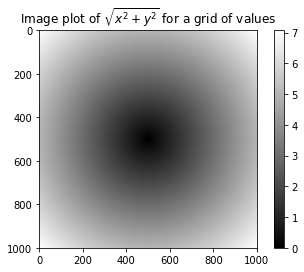

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

# 将条件逻辑表述为数组运算

numpy.where函数是三元表达式x if condition else y的矢量化版本。假设我们有一个布尔数组和两个值数组：